In this notebook we are going to apply **K-means clustering algorithm for image segmentation**.<br>
We aim to **separate a background**: green pieces and orage butterfly. 

### Libraries import

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2 

%matplotlib inline 

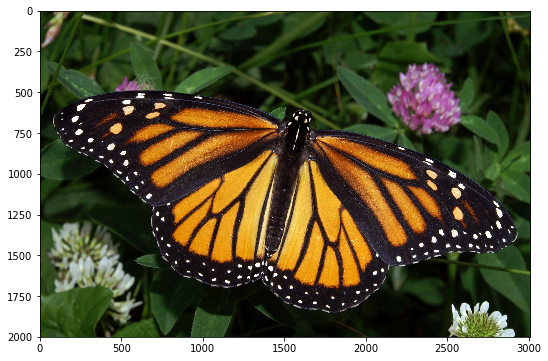

In [2]:
img = cv2.imread('images/monarch.jpg')
img_copy = np.copy(img)

img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
f = plt.figure(figsize = (16,6))
plt.imshow(img_copy)

Let's focus on specific feature - **color of one pixel**. <br>
Before we start, let's prepare dataset for k-means. 

### Dataset preparation for k-means

First, we will reshape our data into **2-dimensional array**:
- first index - **number of pixels**;
- second index - **number of channels**.<br>

As well, we will convert it into float32 type. <br>
Since we are going to use all pixels, we will specify **all rows as -1.**<br>

Suppot example: if wewould like to have 1-dimensional array, we would use `image.reshape(-1)` - all pixels of all 3 channels. 

In [3]:
img_copy.shape

(2000, 3008, 3)

In [4]:
pixel_vals = img_copy.reshape((-1,3))
# convert to float32 
pixel_vals = np.float32(pixel_vals)

### Implement k-means clustering

We start with 2 clusters, so **k=2**, because it will take a shorter time to process.<br>
k = 2 should produce a binary image of **2 most prevalent colors in the image**. <br>
As usually we will use cv2 library for k-means to create a function `cv2.kmeans()`, that has following params: 
- 2D pixels array (pixels, #channels);
- k clusters;
- **labels** we want (`None` in our case);
- **stop criteria, that we need to define**;
- number of attempts; 
- **method**, how do we define our initial center points (use `cv2.KMEANS_RANDOM_CENTERS` - random initialization).

Outputs will be: **retval, labels** (0 and 1 in binary case, when we use k=2), **centers**.

Let's make one step back and define our **stop criteria**. <br>
This criteria will **tell our algorithm, when to stop**. We can specify both **epsilon and iterations**.<br>
Specify:<br>
- epsilon as **1.0** - if our center points will move less than this value after some iterations, we will stop;
- iterations, that equal to **10**. 

In [5]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [6]:
k=2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

Next, we need to display this results.<br>


To do this, we need to convert this back to **8-bit image**.<br>
Additionally, we need to **reshape back** segmented data into **original data shape.**

In [7]:
print('Each pixel out of '+str(len(labels))+' has binary label - 0 or 1 and written in list: '+str(labels[:5]))

Each pixel out of 6016000 has binary label - 0 or 1 and written in list: [[0]
 [0]
 [0]
 [0]
 [0]]


In [8]:
print('We have '+str(len(centers))+' centers with coordinates '+str(centers))

We have 2 centers with coordinates [[ 34.44184   42.473927  21.530634]
 [196.69926  147.2217    78.27061 ]]


Recall, that coordinates are located in **3D space - RGB**.

In [9]:
# convert centers into 8-bit 
centers = np.uint8(centers)
# with the procedure below we replace the binary labels of 0 and 1 by center points 
# use np.flatten() function for this 
segmented_data = centers[labels.flatten()]

Next, **reshape segmented and and labels** into original shape. 

In [10]:
segmented_reshaped = segmented_data.reshape(img_copy.shape)
labels_reshaped = labels.reshape(img_copy.shape[0], img_copy.shape[1])

Now, we are able to **plot an image in a way as an original one**. 

Text(0.5, 1.0, 'Segmented image (k=2)')

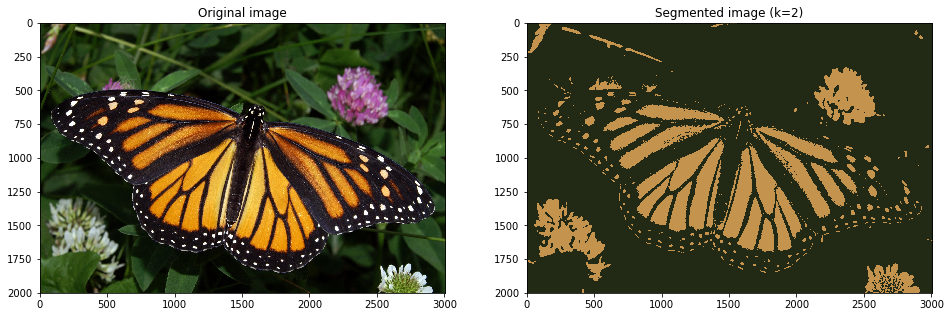

In [11]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))
ax1.imshow(img_copy)
ax1.set_title('Original image')

ax2.imshow(segmented_reshaped)
ax2.set_title('Segmented image (k=2)')

As we see from results, segmented image is broken down by 2 color segments:
- **orange** - butterfly and flowers;
- **dark** background.

We are able to **display the segments one by one** as a binary **black and white** image (like applying mask on each class).

Text(0.5, 1.0, 'Segmented image: label = 0')

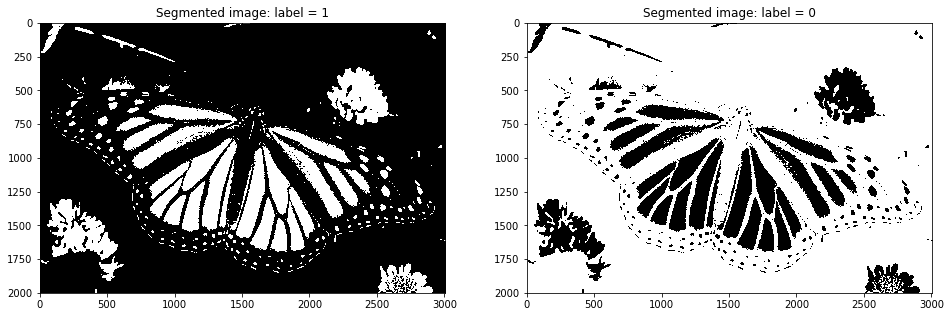

In [12]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))
ax1.imshow(labels_reshaped==1, cmap = 'gray')
ax1.set_title('Segmented image: label = 1')

ax2.imshow(labels_reshaped==0, cmap = 'gray')
ax2.set_title('Segmented image: label = 0')

We can make one step far and **mask particular cluster on original image**.<br>
For example, let's **display specific cluster as black pixels** on original image.  

Text(0.5, 1.0, 'Segmented image: cluster = 1 masked')

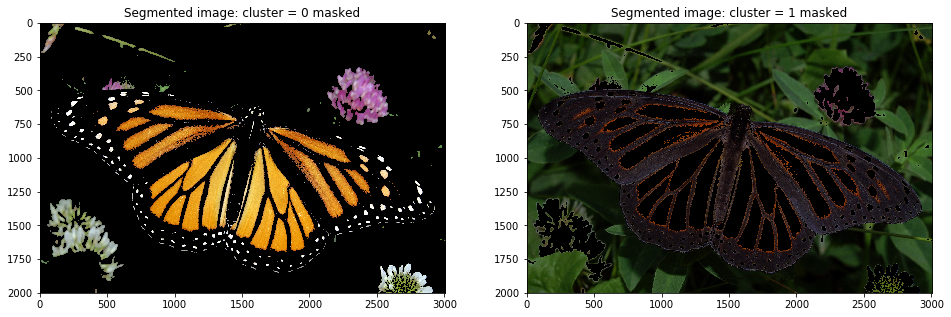

In [24]:
# copy an image to create 2 masks - for 0 and 1 segments 
masked_image_0 = np.copy(img_copy)
masked_image_1 = np.copy(img_copy)

masked_image_0[labels_reshaped == 0] = [0,0,0]
masked_image_1[labels_reshaped == 1] = [0,0,0]

f, (ax1,ax2) = plt.subplots(1,2, figsize = (16,6))
ax1.imshow(masked_image_0)
ax1.set_title('Segmented image: cluster = 0 masked')

ax2.imshow(masked_image_1)
ax2.set_title('Segmented image: cluster = 1 masked')

Finally, let's make step back and **increase the number of clusters to 6**.<br>
It will take bit longer to process an image, but we will be able to **display and image with 6 distinct colors**. 

### Increase number of clusters: k=6

In [27]:
k=6
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert centers into 8-bit 
centers = np.uint8(centers)
# with the procedure below we replace the binary labels of 0 and 1 by center points 
# use np.flatten() function for this 
segmented_data = centers[labels.flatten()]
segmented_reshaped = segmented_data.reshape(img_copy.shape)
labels_reshaped = labels.reshape(img_copy.shape[0], img_copy.shape[1])

Text(0.5, 1.0, 'Segmented image (k=6)')

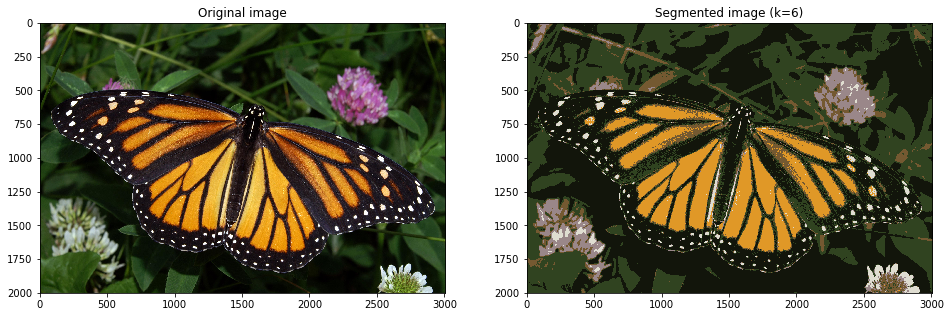

In [28]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))
ax1.imshow(img_copy)
ax1.set_title('Original image')

ax2.imshow(segmented_reshaped)
ax2.set_title('Segmented image (k=6)')

Basically, we can do **anything with these colors**: for instance, isolate the specific segment and make analysis on top. 